# From text to a numerical representation
Typically, Machine Learning algorithms require a vectorial representation for their data. In the IR module, we saw how text can be pre-processed, tokenized, and converted to vector representations. In this tutorial we will be re-using these ideas to create vector representations of documents for the purpose of training classifiers.

We will be using the `scikit-learn` Python library, which provides functionallity for text pre-processing and training and using classifiers. 

In [1]:
## some configurations for notebook and importing modules
%matplotlib inline
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(6490)

In this tutorial, we be using the `newsgroup dataset`, in which documents belong to one of nine categories.

We beging by loading the dataset into a `pandas` Dataframe, which is a two-dimensional labeled data-structure (similar to a table), in which columns represent attributes and rows represent data instances. 

In the resulting `dataset` Dataframe, each row is a document, and the columns represent the id, category and text, of the given document.

In [2]:
from data import read_as_df
from prepros import preprocessor
import os.path

path_to_dataset = os.path.join('question_1_data', 'newsgroups')

dataset = read_as_df(path_to_dataset)
dataset.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/blimmmmk/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,id,category,text
0,51832,comp.sys.mac.hardware,From: walsteyn@fys.ruu.nl (Fred Walsteijn)\nSu...
1,51658,comp.sys.mac.hardware,From: jas@ISI.EDU (Jeff Sullivan)\nSubject: AD...
2,52029,comp.sys.mac.hardware,From: ross@vorpal.ucsb.edu (Richard Ross)\nSub...
3,51667,comp.sys.mac.hardware,From: Ravi Konchigeri <mongoose@leland.stanfor...
4,52224,comp.sys.mac.hardware,From: Kevin Hester <kevinh@apple.com>\nSubject...


We use the preprocessing function in the file `prepros.py`, to pre-process each document in the dataset. 
This will add a new column to the previously created Dataframe.

**NB** This next block might take a while to execute.

In [3]:
dataset['tokens'] = dataset['text'].apply(preprocessor)
dataset.head()

,id,category,text,tokens
0,51832,comp.sys.mac.hardware,From: walsteyn@fys.ruu.nl (Fred Walsteijn)\nSu...,"[walsteyn, fys, ruu, nl, fred, walsteijn, subj..."
1,51658,comp.sys.mac.hardware,From: jas@ISI.EDU (Jeff Sullivan)\nSubject: AD...,"[jas, isi, edu, jeff, sullivan, subject, adb, ..."
2,52029,comp.sys.mac.hardware,From: ross@vorpal.ucsb.edu (Richard Ross)\nSub...,"[ross, vorpal, ucsb, edu, richard, ross, subje..."
3,51667,comp.sys.mac.hardware,From: Ravi Konchigeri <mongoose@leland.stanfor...,"[ravi, konchigeri, mongoos, leland, stanford, ..."
4,52224,comp.sys.mac.hardware,From: Kevin Hester <kevinh@apple.com>\nSubject...,"[kevin, hester, kevinh, appl, com, subject, ii..."



## CountVectorizer

We use scikit-learn's [CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) for vectorizing the tokens.

CountVectorizer itself can remove stop_words, convert text into lowercase tokens.
However, we will not use these options since we have already built a more sophisticated tokenizer, which can stem tokens (which not readily available in scikit-learn). 

To use our tokenizer, we define CountVectorizer with options `tokenizer = lambda x: x`, which means we are asking CountVectorizer to apply the identity function, as we already have a list of tokens available. 

Note that we can set `binary=True` option to use a boolean representation. Setting it to False outputs a term-frequency representation.

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(lowercase = False, 
                                     tokenizer = lambda x: x, # because we already have tokens available
                                     stop_words = None, ## stop words removal already done from NLTK
                                     max_features = 5000, ## pick top 5K words by frequency
                                     ngram_range = (1, 1), ## we want unigrams for now
                                     binary = False) ## we want frequency count features
text_vec = bow_vectorizer.fit_transform(dataset.tokens)
print(text_vec[0, ]) ## see the features indices that are set to 1

  (0, 3765)	4
  (0, 2945)	4
  (0, 1673)	3
  (0, 4172)	1
  (0, 4702)	1
  (0, 3394)	3
  (0, 2562)	2
  (0, 2060)	2
  (0, 3094)	1
  (0, 3256)	1
  (0, 1103)	1
  (0, 4570)	2
  (0, 4625)	2
  (0, 2908)	2
  (0, 2482)	3
  (0, 4882)	1
  (0, 3852)	1
  (0, 1628)	1
  (0, 3059)	1
  (0, 4352)	1
  (0, 2565)	1
  (0, 2644)	1
  (0, 3522)	1
  (0, 2152)	1
  (0, 2983)	1
  :	:
  (0, 1289)	2
  (0, 3654)	1
  (0, 3726)	1
  (0, 423)	1
  (0, 1026)	1
  (0, 204)	1
  (0, 3399)	2
  (0, 1327)	2
  (0, 3373)	1
  (0, 1661)	1
  (0, 175)	1
  (0, 3407)	1
  (0, 4435)	1
  (0, 882)	1
  (0, 406)	1
  (0, 234)	1
  (0, 4328)	1
  (0, 2125)	1
  (0, 2179)	1
  (0, 2155)	1
  (0, 2612)	1
  (0, 272)	1
  (0, 3638)	1
  (0, 1544)	1
  (0, 3249)	1


The vectorial representation represents each document as a vector, in which each dimension corresponds to a word/token in the vocabulary build from the entire dataset/corpus. 

For example, one of the line in the output states:

`(0, 3863)	6`

which means that the first document has 6 occurrences of the $3863^{th}$ feature (word).

Let's see what word corresponds to that index, and what are the first 100 features:

In [5]:
print(bow_vectorizer.get_feature_names()[3863])
## list of feature names (they are just tokens here)
print(bow_vectorizer.get_feature_names()[:100])

senior
['aa', 'aaron', 'ab', 'abil', 'abl', 'abort', 'absolut', 'abstract', 'absurd', 'abus', 'ac', 'academ', 'acc', 'acceler', 'accept', 'access', 'accid', 'accommod', 'accompani', 'accomplish', 'accord', 'account', 'accumul', 'accur', 'accuraci', 'achiev', 'acid', 'acknowledg', 'acm', 'acn', 'acquir', 'acronym', 'across', 'acsu', 'act', 'action', 'activ', 'actual', 'ad', 'adam', 'adapt', 'adaptec', 'adaptor', 'adb', 'adcom', 'add', 'addit', 'address', 'adequ', 'adhes', 'adjust', 'admin', 'administr', 'admit', 'adob', 'adopt', 'adress', 'adrian', 'adult', 'advanc', 'advantag', 'advertis', 'advic', 'advis', 'advisori', 'advoc', 'ae', 'aerospac', 'af', 'affect', 'afford', 'afraid', 'africa', 'ag', 'agat', 'age', 'agenc', 'agent', 'ago', 'agora', 'agre', 'agreement', 'ah', 'ahead', 'ahf', 'ai', 'aid', 'aim', 'air', 'aircraft', 'aix', 'aj', 'ajz', 'ak', 'aka', 'al', 'ala', 'alabama', 'alan', 'alaska']


## The sparsity of the feature space
The feature space is sparse, and as a result CountVectorizer represents documents them using a [sparse matrix](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html), instead of a [dense matrix](https://docs.scipy.org/doc/numpy-1.13.0/reference/arrays.html)
(if each document is a vector, a collection of documents corresponds to a matrix).

To verify this, we can check how many features are enabled in the matrix corresponding to our dataset:

In [6]:
print('{} values are set, out of a maximum of {} = {:.2f}%'.format(
    text_vec.nnz, dataset.shape[0] * 10000, 1.0 * text_vec.nnz / (dataset.shape[0] * 10000) * 100))

685776 values are set, out of a maximum of 88430000 = 0.78%


As we can see, less than 1% of the matrix elements are set, so representing the data with dense matrix would be an inefficient usage of memory. 
Hence, `scikit-learn`'s [Count vectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) internally uses sparse representations.

# Question 1 [7 pts]

<span style="color:blue">
    
### Sections 1.2-1.5 of this notebook each have some tasks for you to complete, these are marked in blue. Completeing these tasks is question 1 of the ML assignment, and you will need to submit this notebook along with your NLP Assignment.ipynb notebook.
</span>

# 1. Building a classifier

## 1.1 Naive Bayes Classifier

Having represented documents in the Vector Space Model, we can now start building a Naive Bayes textual classifier.

To do so, we need will need counts of the term occurrences when computing the $ \hat P(t | c)$.
This amounts to constructing a term-frequency vectorial representation.

Therefore, the [Naive bayes classifier](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB) implementation available in `scikit-learn` requires the document collection to be in a vectorial representation prior to training Naive Bayes.

Next, we split the dataset into a training set (75% of the dataset) and a testing set (25% of the dataset). 
We train a Naive Bayes Classifier on the training set, and we perform the predictions on the test set.

**NB** that we are using `LabelEncoder` here to encode labels/classes of documents as numbers. 
The 9 classes will be mapped into numbers from 0 to 8 using this label encoder. 
We require this to render the dataset compatible with `scikit-learn` and the plotting libraries.

In [7]:
from sklearn.naive_bayes import MultinomialNB
msk = np.random.rand(len(dataset)) < 0.75
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

train_X = text_vec[msk]
test_X = text_vec[~msk]

y = le.fit_transform(dataset.category)
train_y = y[msk]
test_y = y[~msk]

We train the classifier using:

In [8]:
classifier =  MultinomialNB()
classifier.fit(train_X, train_y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

To make predictions, we use the `predict` method.

In [9]:
preds_bow = classifier.predict(test_X)
to_print = [le.inverse_transform([pred])[0] for pred in preds_bow ]
print(to_print[:100])

['comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys

## 1.2 Evaluating the prediction performance [1 pts]
To evaluate how well the classifier performed, we compute the confusion matrix, as well as the overall accuracy, and the per-class precision, recall and F1 measure. 

<span style="color:blue">

### You will need to fill in the code that computes these measure, but note that these are all implemented in the scikit_learn library, and you should make use of this. [1 pts]
</span>.

In [10]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_recall_fscore_support
def print_metrics(y, pred_y):
    confusion = confusion_matrix(y, pred_y)
    acc = accuracy_score(y, pred_y)
    precisions, recalls, f1_scores, _ = precision_recall_fscore_support(y, pred_y, average=None)  

    print("accuracy = {}".format(acc))

    print("{:>25} {:>4} {:>4} {:>4}".format("", "prec", "rec", "F1"))
    for (idx, scores) in enumerate(zip(precisions, recalls, f1_scores)):
        print("{:>25} {:.2f} {:.2f} {:.2f}".format(
            le.inverse_transform([idx])[0], scores[0], scores[1], scores[2]
    ))

    print('confusion matrix:\n{}'.format( confusion) )
    
    return acc

acc_bow = print_metrics(test_y, preds_bow)

accuracy = 0.7777777777777778
                          prec  rec   F1
            comp.graphics 0.71 0.76 0.73
  comp.os.ms-windows.misc 0.72 0.05 0.10
 comp.sys.ibm.pc.hardware 0.53 0.83 0.64
    comp.sys.mac.hardware 0.67 0.92 0.77
           comp.windows.x 0.82 0.83 0.83
                sci.crypt 0.96 0.95 0.95
          sci.electronics 0.84 0.82 0.83
                  sci.med 0.94 0.91 0.93
                sci.space 0.94 0.94 0.94
confusion matrix:
[[191   0  22  11   6   2   8   6   5]
 [ 32  13 112  40  35   3   7   2   1]
 [  4   4 204  24   1   0   9   1   0]
 [  3   0  13 208   0   0   3   0   0]
 [ 17   1  14   6 201   0   1   0   2]
 [  4   0   2   1   1 225   4   1   0]
 [  8   0  17  15   0   1 214   2   4]
 [  4   0   2   5   0   3   5 239   4]
 [  6   0   2   1   0   1   3   3 234]]


## 1.3 Improving the performance with different feature representations [2 pts]

We attempt to improve the classifier's performance using other features.
We start with the boolean features: whenever a feature (token) appears in a document we mark a value of 1 instead of number of occurrence of that token.

We can pipeline vectorization, and classifier in scikit learn. Refer [this documentation](http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.

In [11]:
le = LabelEncoder()

train_X = dataset.tokens[msk]
test_X = dataset.tokens[~msk]
y = le.fit_transform(dataset.category)
train_y = y[msk]
test_y = y[~msk]

Again we will use CountVectorizer, but the difference here is `binary = True` argument, which tells CountVectorizer to use binary features instead of term frequencies.

<span style="color:blue">

### You will need to fill in the code to fit the pipeline model on the training data and create predictions for the test data. [1 pts]
</span>

In [12]:
bin_vectorizer = CountVectorizer(lowercase = False, 
                                     tokenizer = lambda x: x, # because we already have tokens available
                                     stop_words = None, ## stop words removal already done from NLTK
                                     max_features = 5000, ## pick top 5K words by frequency
                                     ngram_range = (1, 1), ## we want unigrams now
                                     binary = True) ## Now it is Binary

from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow',  bin_vectorizer),
    ('naive-bayes',  MultinomialNB()) ])

# Train the pipeline and create predictions for the test set.
pipeline.fit(train_X, train_y)
preds_bin = pipeline.predict(test_X)
acc_bin = print_metrics(test_y, preds_bin)

accuracy = 0.8421052631578947
                          prec  rec   F1
            comp.graphics 0.71 0.77 0.74
  comp.os.ms-windows.misc 0.75 0.77 0.76
 comp.sys.ibm.pc.hardware 0.72 0.77 0.74
    comp.sys.mac.hardware 0.80 0.90 0.85
           comp.windows.x 0.87 0.88 0.88
                sci.crypt 0.97 0.92 0.95
          sci.electronics 0.89 0.74 0.81
                  sci.med 0.96 0.90 0.93
                sci.space 0.94 0.92 0.93
confusion matrix:
[[194  11  13   6  13   3   6   2   3]
 [ 14 189  28   2  11   0   1   0   0]
 [  6  21 190  21   1   0   6   2   0]
 [  6   2   9 204   2   1   2   0   1]
 [ 13  11   3   2 213   0   0   0   0]
 [  4   4   1   2   3 220   2   2   0]
 [ 17   7  18  17   0   1 194   0   7]
 [  9   5   2   1   1   1   3 237   3]
 [ 10   1   0   0   0   1   4   3 231]]


<span style="color:blue">

### Did changing the model to use boolean features instead of term-frequency increase or decrease the model's performance? Explain why the performance did or did not change. [1 pts]
</span>

<span style="color:blue"> YOUR ANSWER HERE </span> <br>
Using the boolean features instead of term-frequency features, the model's performance increases. 
The difference between two models is boolean features count whether a token appears instead of how many times a token appears. There are some tokens which are not very useful for classifying classes but with high term frequency in some texts (say word A frequently appears in class B however it is not a characteristics word for class B). Some text with such tokens may be assigned to wrong classes. When model uses the boolean features, all tokens have the same proportion for classifying which avoids the above situation. The performance correspondly increases.

## 1.4 Improving the performance with  TFIDF [2 pts]
TF-IDF reflects how important a token/term is to a document, with respect to the entire collection of documents. 

<span style="color:blue">


### To build a pipeline with TF-IDF representation, you will need to add a [TfidfTransformer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html) after the bag-of-words vectorizer. [1 pts]
</span>

It means that we are transforming the token counts using TF-IDF.

In [13]:
from sklearn.feature_extraction.text import TfidfTransformer
# https://scikit-learn.org/stable/modules/feature_extraction.html#the-bag-of-words-representation
# Create the pipeline and train and evaluate the model.
pipeline = Pipeline([
    ('bow',  bow_vectorizer),
    ('tfidf', TfidfTransformer()),
    ('naive-bayes',  MultinomialNB()) ])
pipeline.fit(train_X, train_y)
preds_tfidf = pipeline.predict(test_X)
acc_tfidf = print_metrics(test_y, preds_tfidf)

accuracy = 0.860548807917229
                          prec  rec   F1
            comp.graphics 0.81 0.80 0.80
  comp.os.ms-windows.misc 0.75 0.84 0.79
 comp.sys.ibm.pc.hardware 0.77 0.79 0.78
    comp.sys.mac.hardware 0.84 0.89 0.86
           comp.windows.x 0.88 0.88 0.88
                sci.crypt 0.93 0.95 0.94
          sci.electronics 0.88 0.76 0.82
                  sci.med 0.97 0.90 0.93
                sci.space 0.93 0.95 0.94
confusion matrix:
[[200  15   8   4  12   4   4   1   3]
 [  6 206  22   0   9   1   1   0   0]
 [  3  23 194  16   3   1   7   0   0]
 [  3   5  11 202   1   0   4   0   1]
 [ 10  11   2   2 214   1   0   0   2]
 [  4   2   1   0   2 225   2   2   0]
 [  9   8  15  15   2   5 198   1   8]
 [  5   5   0   2   0   3   7 236   4]
 [  7   0   0   0   0   1   1   3 238]]


<span style="color:blue">

### Did changing the model to use tf-idf features increase or decrease the model's performance? Explain why the performance did or did not change. [1 pts]
</span>

<span style="color:blue"> YOUR ANSWER HERE </span> <br>
Using the tf-idf features instead of term-frequency features, the model's performance increases. 
The tf-idf is calculated by the multiplication of term frequency and inverse document frequency. The rare word has high idf value and usally is associated with a specific class. If a text has high frequency of a rare word, there is a high probabilty that the text belongs to the class(which is associated with the rare word). The tf-idf features filter out the tokens with high frequency but not characteristic. So the model's performance increases.

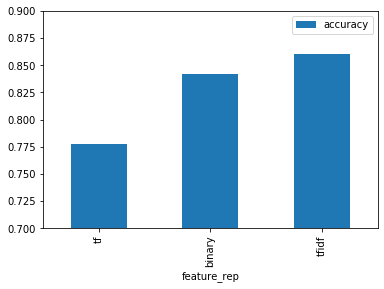

In [14]:
accuracies = pd.DataFrame(
    [('tf', acc_bow), ('binary', acc_bin), ('tfidf', acc_tfidf)], 
    columns = ['feature_rep', 'accuracy']
).set_index('feature_rep')
accuracies.plot.bar(ylim = (0.7, 0.9))

## 1.5 Further improving performance with Bigrams features [2 pts]
Until now, we created feature representations using unigrams, i.e. taking one token as a feature. 
The main disadvantage of doing this is that we loss positional information in unigram feature representation. 
To address this, we can use n-gram as a features: we use sequences of n words to construct features.

<span style="color:blue">

### You will need to train your best performing model, this time usinig both unigram and bigram features. [1 pts]
</span>

In [15]:
from sklearn.feature_extraction.text import TfidfTransformer

# Define the CountVectorizer using the bigrams and unigrams.
bigrams_bow_vectorizer = CountVectorizer(lowercase = False ,
                         tokenizer = lambda x: x, # because we already have tokens available
                         stop_words = None, ## stop words removal already done from NLTK
                         max_features = 5000, ## pick top 5K words by frequency
                         ngram_range = (1, 2), ## we want bigrams for now
                         binary = False) ## we want frequency count features
pipeline = Pipeline([
    ('bow',  bigrams_bow_vectorizer),
    ('tfidf', TfidfTransformer()),
    ('naive-bayes',  MultinomialNB())])
pipeline.fit(train_X,train_y)
preds_tfidf_bigrams = pipeline.predict(test_X)
acc_tfidf_bigrams = print_metrics(test_y, preds_tfidf_bigrams)

accuracy = 0.8344579397210976
                          prec  rec   F1
            comp.graphics 0.78 0.76 0.77
  comp.os.ms-windows.misc 0.73 0.80 0.77
 comp.sys.ibm.pc.hardware 0.72 0.76 0.74
    comp.sys.mac.hardware 0.80 0.87 0.83
           comp.windows.x 0.83 0.86 0.84
                sci.crypt 0.96 0.92 0.94
          sci.electronics 0.86 0.72 0.78
                  sci.med 0.96 0.89 0.93
                sci.space 0.90 0.93 0.91
confusion matrix:
[[191  13  10   6  15   3   5   3   5]
 [ 10 197  22   1  14   0   1   0   0]
 [  3  25 187  19   4   0   8   0   1]
 [  2   6  14 198   2   0   3   0   2]
 [ 12  14   2   2 207   2   0   0   3]
 [  5   2   1   0   3 220   3   2   2]
 [ 12   8  19  19   2   2 189   0  10]
 [  5   4   0   2   1   2  10 234   4]
 [  5   1   4   1   1   0   2   4 232]]


<span style="color:blue">
    
### Did changing the model to use bigram and unigram features increase or decrease the model's performance? Explain why the performance did or did not change. [1 pts]
</span>

<span style="color:blue"> YOUR ANSWER HERE </span> <br>
Using the bigram and unigram features instead of unigram features, the model's performance decreases.
When both bigram and unigram are used, the total number of selected words is still 5000 which means some unigrams and bigrams are unseen in word set. Also, the words are slected by frequency which may cause some bigrams with high frequency (like 'there is', 'it is') are used for classification. Such bigrams are not a characteristic bigram. So the model is not well trained. The performance decreases.

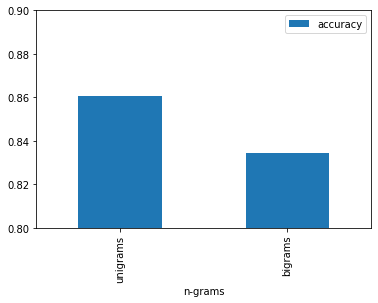

In [16]:
accuracies = pd.DataFrame(
    [('unigrams', acc_tfidf),  ('bigrams', acc_tfidf_bigrams)], 
    columns = ['n-grams', 'accuracy']
).set_index('n-grams')
accuracies.plot.bar(ylim = (0.8, 0.9))

Let's see what bigrams features look like.

In [17]:
print(bigrams_bow_vectorizer.get_feature_names()[:100])

['aa', 'ab', 'abil', 'abl', 'abl get', 'abort', 'absolut', 'abstract', 'abus', 'ac', 'ac edu', 'ac il', 'ac nz', 'ac uk', 'ac za', 'academ', 'acc', 'acceler', 'accept', 'access', 'access digex', 'access onlin', 'access unix', 'accomplish', 'accord', 'account', 'accur', 'accuraci', 'achiev', 'acid', 'acknowledg', 'acm', 'acn', 'acquir', 'across', 'acsu', 'acsu buffalo', 'act', 'action', 'activ', 'actual', 'ad', 'adam', 'adapt', 'adaptec', 'adb', 'add', 'addit', 'address', 'adequ', 'adjust', 'admin', 'administr', 'admit', 'adob', 'adopt', 'adrian', 'advanc', 'advantag', 'advertis', 'advic', 'advis', 'advoc', 'ae', 'aerospac', 'af', 'af mil', 'affect', 'afford', 'afraid', 'age', 'agenc', 'agent', 'ago', 'agre', 'ah', 'ah g', 'ahead', 'ahf', 'ai', 'ai uga', 'aid', 'aim', 'air', 'air forc', 'air g', 'aircraft', 'aix', 'aka', 'al', 'ala', 'alan', 'alaska', 'alaska edu', 'alex', 'alexand', 'algorithm', 'alien', 'allen', 'allerg']


We can notice sequences of two tokens used as features.

# ADDITIONAL MATERIAL 

## Distance metrics and searching in the Vector Space Model

### Distance metrics for a document

In the previous tutorial, we used boolean logic on the set representation of features to perform exact document match. With vector representations introduced in this module, we can query for partial matches. 

The degree of matching can be quantified by similarity metrics. 
The similarity metrics can be computed from distance metrics, where the distance between documents are computed in vector spaces. There are two popular choices for distance metrics in this space:
1. Cosine distance
2. Euclidean distance

To search for similar documents, we use the candidates that has minimum distance with the query's vector representation. We use the TFIDF vectorizer with unigrams representation for this.

In [18]:
vectorizer = Pipeline([
    ('bow',  bow_vectorizer),
    ('tfidf',  TfidfTransformer())])
vectorizer.fit(dataset.tokens)
tfidf_vec = vectorizer.transform(dataset.tokens)

Let's use this vectorizer to create a vector representation of our previous two queries: `research seminar` and `scientific visualization`

In [19]:
tokens1 = preprocessor("research seminar")
query_vec1 = vectorizer.transform([tokens1])

tokens2 = preprocessor("scientific visualization")
query_vec2 = vectorizer.transform([tokens2])

The implementation of the distance metrics are provided in the file `dist.py`. 
Have a look at the functions provided there.

We can use the provided `dist` function as:

In [20]:
from dist import dist, search
cosine_distance = dist(query_vec1.toarray().squeeze(), query_vec2.toarray().squeeze(), method = 'cosine')
euclid_distance = dist(query_vec1.toarray().squeeze(), query_vec2.toarray().squeeze(), method = 'euclid')

print('cosine distance = {}, euclid distance = {}'.format(cosine_distance, euclid_distance))

cosine distance = 1.0, euclid distance = 1.4142135623730951


### Search and ranking

We use the same distance measures to search for similar documents for a query text. 
The most similar documents in our collections are the ones that have lowest distance against the query string. 
We can also use the distance to rank the search results.

Have a look at search function in `dist.py`. 

Top 5 matches with `research seminar`:

In [21]:
## get indexes of the most similar documents 
idxs1 = search(tfidf_vec.toarray().squeeze(),
        query_vec1.toarray().squeeze(),
        dist_measure = 'cosine'
)

## ranked top 5 search results for query 'research seminar'
dataset.iloc[idxs1]

,id,category,text,tokens
4977,38609,comp.graphics,From: lipman@oasys.dt.navy.mil (Robert Lipman)...,"[lipman, oasi, dt, navi, mil, robert, lipman, ..."
1534,8514,comp.os.ms-windows.misc,From: lipman@oasys.dt.navy.mil (Robert Lipman)...,"[lipman, oasi, dt, navi, mil, robert, lipman, ..."
5826,37261,comp.graphics,From: lipman@oasys.dt.navy.mil (Robert Lipman)...,"[lipman, oasi, dt, navi, mil, robert, lipman, ..."
5055,38582,comp.graphics,From: chris@sarah.lerc.nasa.gov (Chris Johnsto...,"[chris, sarah, lerc, nasa, gov, chris, johnsto..."
5516,38782,comp.graphics,From: dsg@ecrc.de (Douglas S. Greer)\nSubject:...,"[dsg, ecrc, de, dougla, greer, subject, resear..."


Top 5 matches with `scientific visualization` based on euclidean distance measure:

In [22]:
idxs2 = search(tfidf_vec.toarray().squeeze(),
        query_vec2.toarray().squeeze(),
        dist_measure = 'euclid'
)

## ranked top 5 search results for query 'research seminar'
dataset.iloc[idxs2]

,id,category,text,tokens
4691,68272,comp.windows.x,From: dbl@visual.COM\nSubject: Re: 'makedepend...,"[dbl, visual, com, subject, makedepend, proble..."
4151,67279,comp.windows.x,"Organization: Ministry of Education, Computer ...","[organ, ministri, educ, comput, center, netnew..."
4882,67383,comp.windows.x,From: herlock@lclark.edu (Jon Herlocker)\nSubj...,"[herlock, lclark, edu, jon, herlock, subject, ..."
4888,66893,comp.windows.x,From: stolk@fwi.uva.nl (Bram)\nSubject: Creati...,"[stolk, fwi, uva, nl, bram, subject, creat, bi..."
4555,66996,comp.windows.x,From: gerard@dps.co.UK (Gerard O'Driscoll)\nSu...,"[gerard, dps, co, uk, gerard, driscol, subject..."


## AUC and ROC 

Another popular evaluation metric for evaluating per class performance of a classifier is the [Area under Curve (AUC) of the Receiver Operating Characteristics (ROC)](https://en.wikipedia.org/wiki/Receiver_operating_characteristic). 

The ROC curve plots the true positive rate (Sensitivity) against the false positive rate (Specificity) for different cut-off points. 
Each point on the ROC curve represents a sensitivity/specificity pair corresponding to a particular decision threshold. 

AUC is the area under ROC curve. $ AUC \in [0.5, 1]$ and a value of $0.5$ corresponds to a random classifiers. Higher is better.

The block below demonstrates how we can use matplotlib (python plotting library) and scikit's evaluation metric functions to plot per class performance of our classifier. 
We will see the plot for our best performing classifier (i.e. TFIDF with bigrams feature representation).

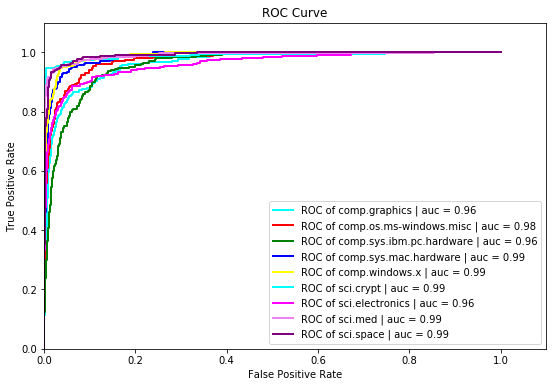

In [23]:
from itertools import cycle
from sklearn.metrics import roc_curve, auc

pipeline = Pipeline([
    ('bigram_bow',  bigrams_bow_vectorizer),
    ('tfidf',  TfidfTransformer()),
    ('naive-bayes',  MultinomialNB()) ])

## Fit the data
pipeline.fit(train_X, train_y)

## This function plots the ROC curve
def plot_roc(labels, probs, le):
    colors = cycle(['aqua', 'red', 'green', 'blue', 'yellow', 'cyan', 'magenta', 'violet', 'purple', 'black', 'grey'])
    fpr, tpr = dict(), dict()
    roc_auc = dict()
    for label in range(len(list(le.classes_))):
        color = next(colors)
        fpr[label], tpr[label], _ = roc_curve(test_y == label, probs[:, label])
        roc_auc[label] = auc(fpr[label], tpr[label])
        plt.plot(fpr[label], tpr[label], color = color, lw=2,
                 label ='ROC of {0} | auc = {1:0.2f}'
                 ''.format(le.inverse_transform([label])[0], roc_auc[label]))
    plt.xlim([0.0, 1.1])
    plt.ylim([0.0, 1.1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")

plt.figure(figsize=(9, 6))  # the plot size you want

## see accuracy and confusion matrix
preds_tfidf_bigrams = pipeline.predict_proba(test_X)
plot_roc(test_y, preds_tfidf_bigrams, le)